In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.transform import resize, rotate
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,  KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
acnh_im_list=os.listdir('acnh_color')
doom_im_list=os.listdir('doom_color')

In [3]:
doom=pd.read_csv('archive/doom_crossing_dataset.csv')
acnh=pd.read_csv('archive/animal_crossing_dataset.csv')

In [4]:
for idx, name in enumerate(doom['filename']):
    doom['filename'][idx]=name.replace('jpg', 'png')

In [6]:
for idx, name in enumerate(acnh['filename']):
    acnh['filename'][idx]=name.replace('jpg', 'png')

In [7]:
index_a=pd.Index(acnh['filename'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['filename'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)
y=pd.concat([doom_sub ,acnh_sub])

In [8]:
acnh_file_map=pd.DataFrame({'filename':acnh['filename'], 'subreddit': acnh['subreddit']}).set_index(pd.Index(acnh['id']))
doom_file_map=pd.DataFrame({'filename':doom['filename'], 'subreddit': doom['subreddit']}).set_index(pd.Index(doom['id']))
file_map=pd.concat([doom_file_map, acnh_file_map])

In [ ]:
col_names=[]
for name in range(1, 33):
    col_1=str(name)+'r'
    col_names.append(col_1)
    col_2=str(name)+'b'
    col_names.append(col_2)
    col_3=str(name)+'g'
    col_names.append(col_3)
    col_4=str(name)+'count'
    col_names.append(col_4)

In [ ]:
d={}
for name in col_names:
    d[name]=


In [76]:
im=io.imread('doom_color/'+doom_im_list[69]).reshape(-1, 3)
document=[]#corpus.append()
for row in im:
    r=(str(5*round(row[0]/5)))
    b=(str(5*round(row[1]/5)))
    g=(str(5*round(row[2]/5)))
    document.append(r +', ' + b +', ' + g)

In [77]:
d={}
for colors in document:
    if colors in d.keys():
        d[colors]+=1
    else:
        d[colors]=1

In [ ]:
type(list(d.values()))

In [97]:
d_cols={}
vals=sorted(list(d.values()))
for idx, val in enumerate(vals):
    for k,v in d.items():
        if v==val:
            lst=k.split(', ')
            int_lst=[int(float((num))) for num in lst]
            d_cols[str(idx)+'count']=val
            d_cols[str(idx)+'r']=int_lst[0]
            d_cols[str(idx)+'b']=int_lst[1]
            d_cols[str(idx)+'g']=int_lst[2]

430
612
798
1053
1110
1209
1278
1377
1526
2028
2207
3120
3141
3395
3666
3876
3902
3989
4592
46691


In [98]:
d_cols

{'0count': 430,
 '0r': 110,
 '0b': 25,
 '0g': 210,
 '1count': 612,
 '1r': 160,
 '1b': 50,
 '1g': 215,
 '2count': 798,
 '2r': 60,
 '2b': 15,
 '2g': 215,
 '3count': 1053,
 '3r': 205,
 '3b': 205,
 '3g': 245,
 '4count': 1110,
 '4r': 240,
 '4b': 150,
 '4g': 230,
 '5count': 1209,
 '5r': 235,
 '5b': 110,
 '5g': 220,
 '6count': 1278,
 '6r': 235,
 '6b': 230,
 '6g': 250,
 '7count': 1377,
 '7r': 225,
 '7b': 60,
 '7g': 210,
 '8count': 1526,
 '8r': 180,
 '8b': 180,
 '8g': 240,
 '9count': 2028,
 '9r': 160,
 '9b': 155,
 '9g': 235,
 '10count': 2207,
 '10r': 5,
 '10b': 0,
 '10g': 210,
 '11count': 3120,
 '11r': 95,
 '11b': 85,
 '11g': 225,
 '12count': 3141,
 '12r': 115,
 '12b': 110,
 '12g': 230,
 '13count': 3395,
 '13r': 75,
 '13b': 70,
 '13g': 225,
 '14count': 3666,
 '14r': 55,
 '14b': 55,
 '14g': 220,
 '15count': 3876,
 '15r': 135,
 '15b': 135,
 '15g': 235,
 '16count': 3902,
 '16r': 15,
 '16b': 15,
 '16g': 215,
 '17count': 3989,
 '17r': 40,
 '17b': 40,
 '17g': 220,
 '18count': 4592,
 '18r': 30,
 '18b'

In [9]:
colors_doom=pd.DataFrame()
color_words_doom=pd.DataFrame()
for im in doom_im_list:
    im=io.imread('doom_color/' + im).reshape(-1, 3)
    document=[]#corpus.append()
    for row in im:
        r=(str(5*round(row[0]/5)))
        b=(str(5*round(row[1]/5)))
        g=(str(5*round(row[2]/5)))
        document.append(r +', ' + b +', ' + g)
        
    d={}
    for colors in document:
        if colors in d.keys():
            d[colors]+=1
        else:
            d[colors]=1
            
    color_words_doom=color_words_doom.append(d, ignore_index=True)
    
    d_cols={}
    vals=sorted(list(d.values()))
    for idx, val in enumerate(vals):
        for k,v in d.items():
            if v==val:
                lst=k.split(', ')
                int_lst=[int(float((num))) for num in lst]
                d_cols[str(idx)+'count']=val
                d_cols[str(idx)+'r']=int_lst[0]
                d_cols[str(idx)+'b']=int_lst[1]
                d_cols[str(idx)+'g']=int_lst[2]
                
    colors_doom=colors_doom.append(d_cols, ignore_index=True)

In [15]:
cwd=color_words_doom.copy()
cd=colors_doom.copy()

In [18]:
cwd.set_index(index_d, inplace=True)
cd.set_index(index_d, inplace=True)
cwd.fillna(0, inplace=True)
cd.fillna(0, inplace=True)

In [26]:
pwd

'/Users/johnwilliams/Heather/Galvanize/capstones/acnh_v_doom'

In [43]:
cwd.to_csv('doom_colors_words.csv')
cd.to_csv('doom_colors.csv')

In [33]:
colors_acnh=pd.DataFrame()
color_words_acnh=pd.DataFrame()
rejects=[]
for im in acnh_im_list:
    try:
        im=io.imread('acnh_color/' + im).reshape(-1, 3)
        document=[]#corpus.append()
        for row in im:
            r=(str(5*round(row[0]/5)))
            b=(str(5*round(row[1]/5)))
            g=(str(5*round(row[2]/5)))
            document.append(r +', ' + b +', ' + g)

        d={}
        for colors in document:
            if colors in d.keys():
                d[colors]+=1
            else:
                d[colors]=1

        color_words_acnh=color_words_acnh.append(d, ignore_index=True)

        d_cols={}
        vals=sorted(list(d.values()))
        for idx, val in enumerate(vals):
            for k,v in d.items():
                if v==val:
                    lst=k.split(', ')
                    int_lst=[int(float((num))) for num in lst]
                    d_cols[str(idx)+'count']=val
                    d_cols[str(idx)+'r']=int_lst[0]
                    d_cols[str(idx)+'b']=int_lst[1]
                    d_cols[str(idx)+'g']=int_lst[2]

        colors_acnh=colors_acnh.append(d_cols, ignore_index=True)
    except:
        rejects.append(im)

In [44]:
cwa=color_words_acnh.copy()
ca=colors_acnh.copy()

In [45]:
cwa.set_index(index_a, inplace=True)
ca.set_index(index_a, inplace=True)
cwa.fillna(0, inplace=True)
ca.fillna(0, inplace=True)

In [47]:
cwa.to_csv('acnh_colors_words.csv')
ca.to_csv('acnh_colors.csv')

In [30]:
pd.Index(acnh['filename'])

TypeError: Image data of dtype <U17 cannot be converted to float

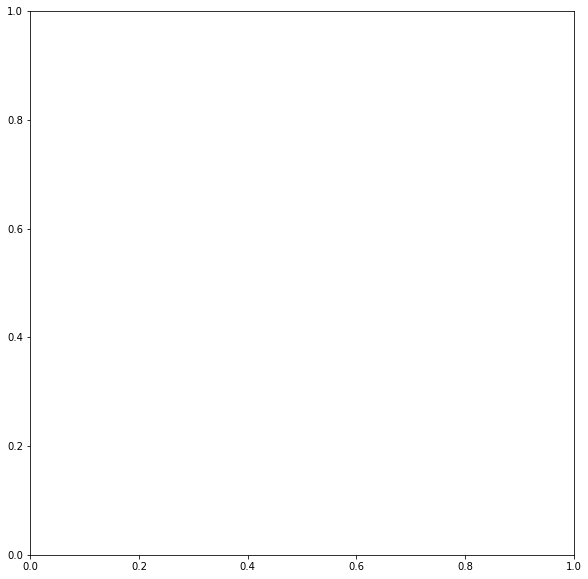